# Data Analysis of real estate listings for the twin cities area

## Solution Methedology

I do not have to necessarily use all the features given in the dataset to solve all the questions but rather consider every question as a special problem that depends on a subset of the features in the dataset where this subset might be all the given features in the data but this depends on the question being asked.

## Data Exploration 

In [7]:
# import pandas library
import pandas as pd

# Read the excel file in a pandas data frame and print the first 5 values to get an idea on how it looks like
dataset = pd.read_excel('AKQA_Dataset_Test.xlsx')
print dataset.head(5),'\n'

# Drop the LastSaleData feature since we will not use it 
dataset = dataset.drop('LastSaleDate',axis=1)

# Create new Age feature from the YearBuilt feature and add it to the dataset
dataset['age'] = 2014 - dataset['YearBuilt']

# Get dataset dimensions
dataset_dimensions = dataset.shape
print 'The dataset consists of: \n {} listings \n {} features for each listing \n'.format(dataset_dimensions[0], 
                                                                                          dataset_dimensions[1])

# Get statistics for numerical features in the dataset
print 'The descriptive statistics for the numerical values in the dataset are as follows: \n {}'.format(
    dataset.describe())

        ID                 ADDRESS       CITY STATE    ZIP  ListPrice  BEDS  \
0  4416206   1000 Larpenteur Ave W   St. Paul    MN  55113     214000     3   
1  4423768        1004 Charles Ave   St. Paul    MN  55104     134900     3   
2  4427963          1004 Euclid St   St. Paul    MN  55106     129722     4   
3  4432178  1005 Saint Anthony Ave   St. Paul    MN  55104     134900     2   
4  4440070      100X Chatsworth Pl  Shoreview    MN  55126     444900     4   

   BATHS                LOCATION  SQFT    ...      YearBuilt  ParkingSpots  \
0   2.00                    Como  1954    ...           1918             2   
1   1.00  Thomas-Dale (Frogtown)  1028    ...           1911             1   
2   1.00          Dayton's Bluff  1420    ...           1900             0   
3   1.75       Summit-University   904    ...           1928             3   
4   2.50               Shoreview  2014    ...           2014             3   

   HasGarage  DOM  LastSaleDate SoldPrev                

### Comments on the data

Its clear from seeing the statistics of the data is that some features have NAN points which greatly affect the statistics, these points might need to be discarded, however this decision will be made depending on wether the question depends on these points or not 

## Question 2 

### All things being equal what would you predict as the listing price for a 2111 square foot house if that was the only information you had on a house in this area? How did you arrive at that estimate? Please explain.

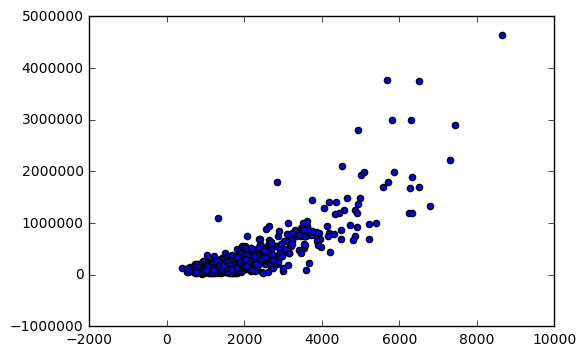

In [8]:
# import matplotlib library
import matplotlib.pyplot as plt
import numpy as np

# Get SQFT and List pricing data from the dataset
home_square_footage = np.array(dataset['SQFT']).reshape(-1,1)
listing_prices = np.array(dataset['ListPrice']).squeeze()

# Generate scatter plot for the houses
plt.scatter(home_square_footage, listing_prices)
plt.show()



### Comments on the Scatter Plot 

Its Clear from the scatter plot of the data that the a ploynomial regression of a degree probably higher than 3 would be needed to non-linearly fit the data

### Define functions needed for testing polynomial curves with different degrees
        1) performance_metric(true values, predecited values) - measure performance of a classifier based on the the
        coefficient of determination score function 
        2) fit_model(input variable, output target variable) - fit model with different parameter values using cross 
        validation and a performance metric to determine the model with the highest performance

In [9]:
# import libraries needed for measuring model performance based on tuned parameters
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score as r2
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

# Function for determining the performance of a classifier
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between
        true and predicted values based on the metric chosen. """

    score = r2(y_true, y_predict)

    # Return the score
    return score

# Fuction for fitting model on data with cross validation and parameter tuning
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2, random_state=0)

    # TODO: Create a polynomial regression object
    regressor = make_pipeline(PolynomialFeatures(), Ridge())
    print regressor.get_params().keys()

    # TODO: Create a dictionary for the parameter 'degrees' with a range from 1 to 10
    params = {'polynomialfeatures__degree': [1, 2, 3 , 4 , 5 , 6, 7, 8, 9, 10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer'
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

['ridge__solver', 'ridge', 'polynomialfeatures__include_bias', 'polynomialfeatures__degree', 'ridge__max_iter', 'ridge__copy_X', 'ridge__alpha', 'polynomialfeatures__interaction_only', 'ridge__tol', 'steps', 'ridge__normalize', 'polynomialfeatures', 'ridge__random_state', 'ridge__fit_intercept']

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])


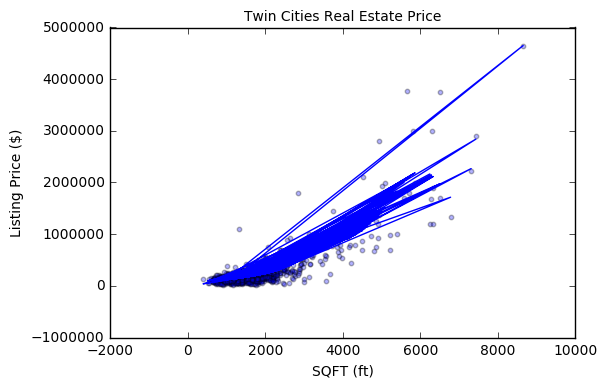

The listing price for a 2111 square foot house is $258699.210616


In [11]:
# Find best estimator with best tuned parameters
best_estimator = fit_model(sqft, listing_prices)
print '\n', best_estimator

# Get Prediction with the best estimator
predicted_listing_prices = best_estimator.predict(sqft)

# Plot scatter plot of the data
plt.scatter(sqft, listing_prices, s=10, alpha=0.3)

# plot predicted listing prices on the same plot
plt.plot(sqft, predicted_listing_prices)
plt.title("Twin Cities Real Estate Price", fontsize='10')
plt.xlabel('SQFT (ft)', fontsize='10')
plt.ylabel('Listing Price ($)', fontsize='10')
plt.show()
plt.savefig("TwinCities_real_estate_polynomial_regression.jpg", dpi=300)
plt.close()

print 'The listing price for a 2111 square foot house is ${}'.format(best_estimator.predict(2111)[0])


### Comments on the Prediction 

The prediction looks reasonable because, the square footage in question is close to the 75th percentile which is equal to 1964 ft which has a price of $2550000